In [1]:
# Create Latitude and Longitude Combinations

# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the datetime module from the datetime library.
from datetime import datetime



In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# 6.1.5 Generate Random World Cities
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

623

In [5]:
############################################ 6.2.6 Get the City Weather Data ############################################
# Import your Requests Library and the weather_api_key
from config import weather_api_key
import requests

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tawkar
City not found. Skipping...
Processing Record 2 of Set 1 | butaritari
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | trincomalee
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | touros
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | port-gentil
Processing Record 10 of Set 1 | ribeira grande
Processing Record 11 of Set 1 | upernavik
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | new norfolk
Processing Record 14 of Set 1 | moranbah
Processing Record 15 of Set 1 | qaanaaq
Processing Record 16 of Set 1 | simao
Processing Record 17 of Set 1 | cape town
Processing Record 18 of Set 1 | along
Processing Record 19 of Set 1 | manaure
Processing Record 20 of Set 1 | los llanos de aridane
Processing Record 21 of Set 1 | waddan
Processing Record 22 of Set 1 | khatanga
Pr

Processing Record 40 of Set 4 | sigli
Processing Record 41 of Set 4 | phalodi
Processing Record 42 of Set 4 | crotone
Processing Record 43 of Set 4 | chapais
Processing Record 44 of Set 4 | luderitz
Processing Record 45 of Set 4 | ahipara
Processing Record 46 of Set 4 | geraldton
Processing Record 47 of Set 4 | san martin
Processing Record 48 of Set 4 | ampanihy
Processing Record 49 of Set 4 | kargasok
Processing Record 50 of Set 4 | atuona
Processing Record 1 of Set 5 | tessaoua
Processing Record 2 of Set 5 | lavrentiya
Processing Record 3 of Set 5 | belaya gora
Processing Record 4 of Set 5 | vostok
Processing Record 5 of Set 5 | margate
Processing Record 6 of Set 5 | galesong
Processing Record 7 of Set 5 | tuatapere
Processing Record 8 of Set 5 | azimur
City not found. Skipping...
Processing Record 9 of Set 5 | talnakh
Processing Record 10 of Set 5 | dunedin
Processing Record 11 of Set 5 | jumla
Processing Record 12 of Set 5 | marcona
City not found. Skipping...
Processing Record 13 

Processing Record 31 of Set 8 | ajdabiya
Processing Record 32 of Set 8 | burkhala
City not found. Skipping...
Processing Record 33 of Set 8 | erenhot
Processing Record 34 of Set 8 | nouadhibou
Processing Record 35 of Set 8 | grigiskes
Processing Record 36 of Set 8 | ordu
Processing Record 37 of Set 8 | ilhabela
Processing Record 38 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 39 of Set 8 | nago
Processing Record 40 of Set 8 | manali
Processing Record 41 of Set 8 | nanortalik
Processing Record 42 of Set 8 | bana
Processing Record 43 of Set 8 | ust-tsilma
Processing Record 44 of Set 8 | mnogovershinnyy
Processing Record 45 of Set 8 | paamiut
Processing Record 46 of Set 8 | chicama
Processing Record 47 of Set 8 | sept-iles
Processing Record 48 of Set 8 | serramanna
Processing Record 49 of Set 8 | dalianwan
Processing Record 50 of Set 8 | karpogory
Processing Record 1 of Set 9 | apatou
Processing Record 2 of Set 9 | airai
Processing Record 3 of Set 9 | lar gerd
City no

Processing Record 21 of Set 12 | roald
Processing Record 22 of Set 12 | sampit
Processing Record 23 of Set 12 | lorengau
Processing Record 24 of Set 12 | korla
Processing Record 25 of Set 12 | koumac
Processing Record 26 of Set 12 | pisco
Processing Record 27 of Set 12 | avera
Processing Record 28 of Set 12 | biak
Processing Record 29 of Set 12 | cochrane
Processing Record 30 of Set 12 | balaipungut
Processing Record 31 of Set 12 | changchun
Processing Record 32 of Set 12 | puerto ayacucho
Processing Record 33 of Set 12 | flinders
Processing Record 34 of Set 12 | sinnamary
Processing Record 35 of Set 12 | kosh-agach
Processing Record 36 of Set 12 | lolua
City not found. Skipping...
Processing Record 37 of Set 12 | chauk
Processing Record 38 of Set 12 | at-bashi
Processing Record 39 of Set 12 | waitati
Processing Record 40 of Set 12 | coyaima
Processing Record 41 of Set 12 | cam ranh
Processing Record 42 of Set 12 | san andres
Processing Record 43 of Set 12 | groningen
Processing Record

In [6]:
print(len(city_data))

572


In [7]:
#############################  6.2.7 - Create a DataFrame of City Weather Data  #############################
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Butaritari,3.07,172.79,83.68,79,13,17.49,KI,2020-08-02 01:15:30
1,Jamestown,42.10,-79.24,68.00,88,90,6.93,US,2020-08-02 01:12:35
2,Trincomalee,8.57,81.23,81.52,76,100,21.30,LK,2020-08-02 01:11:33
3,Mataura,-46.19,168.86,52.83,84,100,1.21,NZ,2020-08-02 01:15:30
4,Rikitea,-23.12,-134.97,74.08,75,0,5.97,PF,2020-08-02 01:15:30
5,Touros,-5.20,-35.46,73.40,94,40,8.05,BR,2020-08-02 01:15:30
6,Ushuaia,-54.80,-68.30,37.40,86,100,5.82,AR,2020-08-02 01:12:16
7,Port-Gentil,-0.72,8.78,74.34,80,100,10.56,GA,2020-08-02 01:15:30
8,Ribeira Grande,38.52,-28.70,71.11,67,1,6.82,PT,2020-08-02 01:15:30
9,Upernavik,72.79,-56.15,42.46,69,0,13.44,GL,2020-08-02 01:15:30


In [8]:
# reorder the columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed
new_column_order = ["City", "Country", "Date","Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Butaritari,KI,2020-08-02 01:15:30,3.07,172.79,83.68,79,13,17.49
1,Jamestown,US,2020-08-02 01:12:35,42.10,-79.24,68.00,88,90,6.93
2,Trincomalee,LK,2020-08-02 01:11:33,8.57,81.23,81.52,76,100,21.30
3,Mataura,NZ,2020-08-02 01:15:30,-46.19,168.86,52.83,84,100,1.21
4,Rikitea,PF,2020-08-02 01:15:30,-23.12,-134.97,74.08,75,0,5.97
5,Touros,BR,2020-08-02 01:15:30,-5.20,-35.46,73.40,94,40,8.05
6,Ushuaia,AR,2020-08-02 01:12:16,-54.80,-68.30,37.40,86,100,5.82
7,Port-Gentil,GA,2020-08-02 01:15:30,-0.72,8.78,74.34,80,100,10.56
8,Ribeira Grande,PT,2020-08-02 01:15:30,38.52,-28.70,71.11,67,1,6.82
9,Upernavik,GL,2020-08-02 01:15:30,72.79,-56.15,42.46,69,0,13.44


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

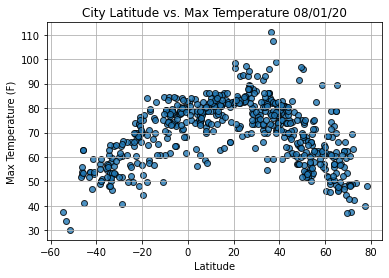

In [12]:
# Import the time module.
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

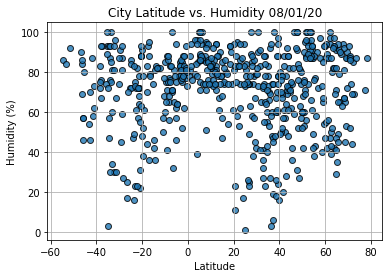

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

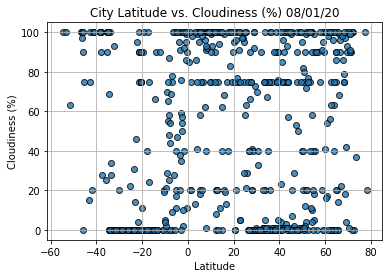

In [14]:
#############################  6.3.3 - Plot Latitude vs. Cloudiness  #############################  

# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


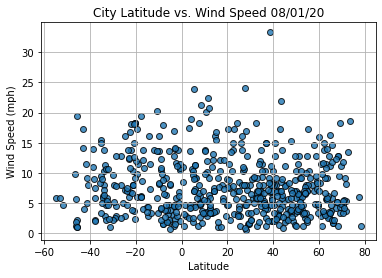

In [15]:
#############################  6.3.4 - Plot Latitude vs. Wind Speed  #############################  
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()


In [16]:
##########################  6.4.2 - Find the Correlation Between Latitude and Maximum Temperature  ##########################
# Create a Linear Regression Function

from scipy.stats import linregress
import matplotlib.pyplot as plt

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()


In [17]:
# Create the Hemisphere DataFrames
index13 = city_data_df.loc[13]
index13

City                      Qaanaaq
Country                        GL
Date          2020-08-02 01:15:30
Lat                         77.48
Lng                        -69.36
Max Temp                    39.78
Humidity                       71
Cloudiness                    100
Wind Speed                   5.95
Name: 13, dtype: object

In [18]:
# get all Northern Hemisphere latitudes, for latitudes greater than or equal to 0
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3      False
4      False
       ...  
567     True
568     True
569     True
570     True
571     True
Name: Lat, Length: 572, dtype: bool

In [19]:
# for latitudes greater than or equal to 0
city_data_df.loc[(city_data_df["Lat"] >= 0)].head(5)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Butaritari,KI,2020-08-02 01:15:30,3.07,172.79,83.68,79,13,17.49
1,Jamestown,US,2020-08-02 01:12:35,42.10,-79.24,68.00,88,90,6.93
2,Trincomalee,LK,2020-08-02 01:11:33,8.57,81.23,81.52,76,100,21.30
8,Ribeira Grande,PT,2020-08-02 01:15:30,38.52,-28.70,71.11,67,1,6.82
9,Upernavik,GL,2020-08-02 01:15:30,72.79,-56.15,42.46,69,0,13.44


In [20]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

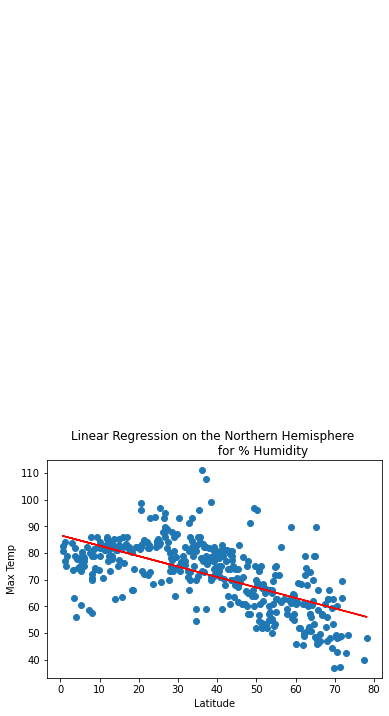

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n \
                        for % Humidity', 'Max Temp',(10,280))

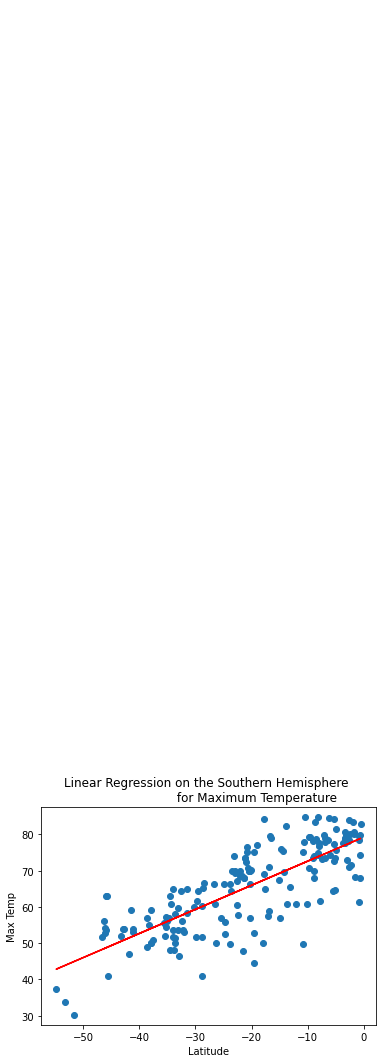

In [22]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n \
                        for Maximum Temperature', 'Max Temp',(-50,305))

########################################################## FINDINGS ##########################################################
# The correlation between the latitude and the maximum temperature is strong to very strong because the r-value is less 
# than –0.7 for the Northern Hemisphere and greater than 0.7 for the Southern Hemisphere, as shown by the plots here. This means
# that as we approach the equator, 0° latitude, the temperatures become warmer. And when we are further from the equator the 
# temperatures become cooler. Check the r-values for your plots. 

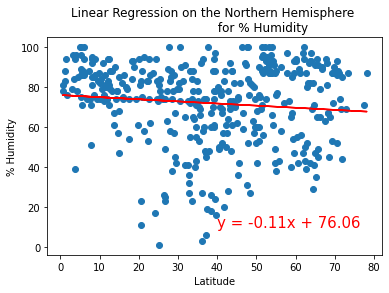

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n \
                        for % Humidity', '% Humidity',(40,10))

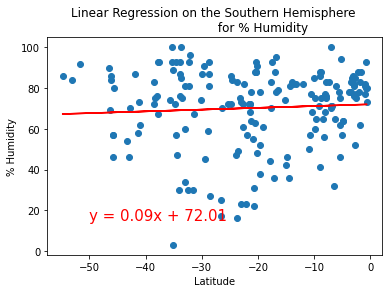

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n \
                        for % Humidity', '% Humidity',(-50,15))

########################################################## FINDINGS ##########################################################
# The correlation between the latitude and percent humidity is very low because the r-value is less than 0.04 for the Northern 
# and Southern Hemispheres for the plots shown here. This means that percent humidity is unpredictable due to changing weather 
# patterns that can increase or decrease percent humidity. Check the r-values for your plots. 

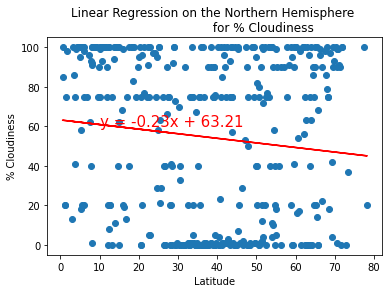

In [25]:
#######################  6.4.4 - Find the Correlation Between Latitude and Percent Cloudiness ####################### 
# SKILL DRILL - Perform Linear Regression on the Percent Cloudiness for the Northern Hemisphere

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n \
                        for % Cloudiness', '% Cloudiness',(10,60))


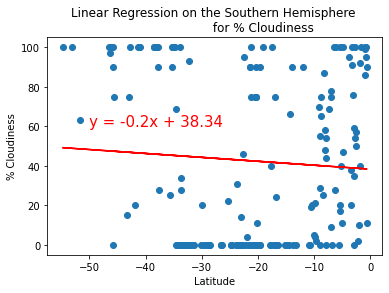

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n \
                        for % Cloudiness', '% Cloudiness',(-50,60))

########################################################## FINDINGS ##########################################################
# The correlation between the latitude and percent cloudiness is very low because the r-value is less than –0.09 for the 
# Northern Hemisphere and less than –0.02 for the Southern Hemisphere for the plots shown here. This means that cloudiness is 
# unpredictable due to changing weather patterns that can increase or decrease percent cloudiness. Check the r-values for your 
# plots. 

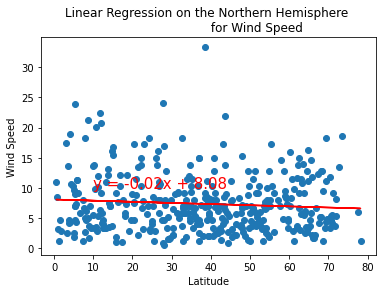

In [27]:
#######################  6.4.5 - Find the Correlation Between Latitude and Wind Speed #######################  

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n \
                        for Wind Speed', 'Wind Speed',(10,10))


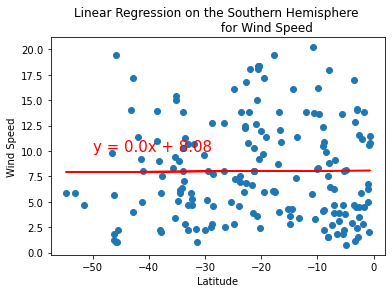

In [28]:
# Perform Linear Regression on the Wind Speed for the Southern Hemisphere
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n \
                        for Wind Speed', 'Wind Speed',(-50,10))

########################################################## FINDINGS ##########################################################
# The correlation between the latitude and wind speed is very low because the r-value is less  than –0.07 for the Northern 
# Hemisphere and less than –0.3 for the Southern Hemisphere for the plots shown here . This means that wind speed is 
# unpredictable due to changing weather patterns that can increase or decrease wind speed. Check the r-values for your plots. 